In [1]:
import os
import skimage
from skimage import data
import PIL
from PIL import Image

import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels


In [3]:
ROOT_PATH = '/host/Can/targaMedium/'
train_data_directory = os.path.join(ROOT_PATH, "outPut/train")
test_data_directory = os.path.join(ROOT_PATH, "outPut/val")
images, labels = load_data(train_data_directory)
testImages,testLabels= load_data(test_data_directory)


1925


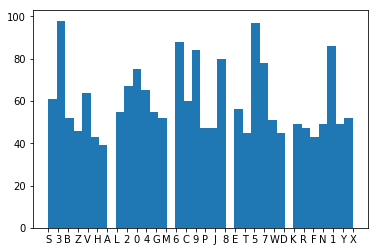

In [4]:
plt.hist(labels,36)
print(len(images))

In [5]:
type(images[0])


numpy.ndarray

In [6]:
images[0].shape

(16, 8, 3)

In [7]:
traffic_signs = []
for i in range(0,5,1):
    traffic_signs.append(randint(0,len(images)))#random choose 5 images in length images
print(traffic_signs)


[658, 799, 282, 1109, 594]


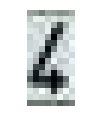

shape:(16, 8, 3),min:0,max:255


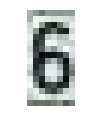

shape:(16, 8, 3),min:0,max:255


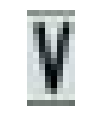

shape:(16, 8, 3),min:0,max:238


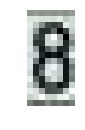

shape:(16, 8, 3),min:0,max:255


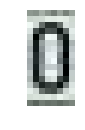

shape:(16, 8, 3),min:0,max:253


In [8]:
for i in range(len(traffic_signs)):
    plt.subplot(1,len(traffic_signs),i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print('shape:{0},min:{1},max:{2}'.format(images[traffic_signs[i]].shape,#shape
                                            images[traffic_signs[i]].min(),#min pixel
                                            images[traffic_signs[i]].max()))#max pixel



In [9]:
unique_labels = set(labels)#get the unique labels

In [10]:
plt.figure(figsize=(15,15))


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [11]:
unique_labels

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'J',
 'K',
 'L',
 'M',
 'N',
 'P',
 'R',
 'S',
 'T',
 'V',
 'W',
 'X',
 'Y',
 'Z'}

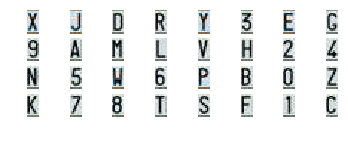

In [12]:
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    #plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)

In [13]:
labels


['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'

In [14]:
#labels = [ord(label) for label in labels]#convert from string into numbers

In [15]:
#labels

In [16]:
images[0]


array([[[137, 147, 139],
        [130, 140, 132],
        [142, 152, 144],
        [143, 153, 145],
        [142, 152, 144],
        [147, 157, 149],
        [149, 159, 151],
        [137, 147, 139]],

       [[207, 217, 209],
        [224, 234, 226],
        [231, 241, 233],
        [203, 213, 205],
        [226, 236, 228],
        [220, 230, 222],
        [204, 214, 206],
        [218, 228, 220]],

       [[222, 231, 226],
        [217, 226, 221],
        [137, 146, 141],
        [ 55,  64,  59],
        [ 28,  37,  32],
        [ 73,  82,  77],
        [193, 202, 197],
        [220, 229, 224]],

       [[217, 226, 223],
        [150, 159, 156],
        [ 26,  35,  32],
        [ 53,  62,  59],
        [102, 111, 108],
        [ 43,  52,  49],
        [ 31,  40,  37],
        [182, 191, 188]],

       [[203, 212, 209],
        [ 67,  76,  73],
        [ 43,  52,  49],
        [193, 202, 199],
        [234, 243, 240],
        [145, 154, 151],
        [  3,  12,   9],
        [159, 168

In [17]:
#########################################################################################

In [18]:
from skimage.color import rgb2gray
#images16 = np.array(images)#convert into array

images16bw = np.array(images)
images16bw = rgb2gray(images16bw)

In [19]:

testImages16 = np.array(testImages)
testImages16bw = rgb2gray(testImages16)
trX,trY = images16bw,labels
trX = np.reshape(images16bw,[-1,16,8,1])

teX,teY = testImages16bw,testLabels
teX = np.reshape(testImages16bw,[-1,16,8,1])
#teY = [ord(testLabel) for testLabel in testLabels]#convert from string into numbers



In [20]:
#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

trYN,teYN = array(trY),array(teY)#make to be array




In [21]:
label_encoder = LabelEncoder()#handle

In [22]:
integer_encoded_trY = label_encoder.fit_transform(trYN)
integer_encoded_teY = label_encoder.fit_transform(teYN)

In [23]:
onehot_encoder = OneHotEncoder(sparse=False)#handle
onehot_encoded_trY_reshape = integer_encoded_trY.reshape(len(integer_encoded_trY),1)
onehot_encoded_teY_reshape = integer_encoded_teY.reshape(len(integer_encoded_teY),1)#reshape integer to onehot

In [24]:
onehot_encoded_trY = onehot_encoder.fit_transform(onehot_encoded_trY_reshape)
onehot_encoded_teY = onehot_encoder.fit_transform(onehot_encoded_teY_reshape)


In [25]:
onehot_encoded_trY_inverted = label_encoder.inverse_transform([argmax(onehot_encoded_trY[0,:])])#inverted
onehot_encoded_teY_inverted = label_encoder.inverse_transform([argmax(onehot_encoded_teY[0,:])])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
onehot_encoded_trY_inverted

array(['S'], dtype='<U1')

In [27]:
trY,teY = onehot_encoded_trY,onehot_encoded_teY

In [28]:
# one hot encode





In [29]:
#print(trX.shape,teX.shape,len(trY),len(teY))

In [30]:
batch_size = 6


test_size = batch_size*2


# 初始化权值与定义网络结构，建构一个3个卷积层和3个池化层，一个全连接层和一个输出层的卷积神经网络
# 首先定义初始化权重函数
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


# 第一组卷积层以及池化层，最后　droupout是为了防止过拟合，在模型训练的时候丢掉一些神经元
# padding表示对边界的处理，SAME表示卷积的输入和输出保持同样尺寸
def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,
                                  strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],  # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    # 第二组卷积层及池化层，最后dropout一些神经元
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,  # l2a shape=(?, 14, 14, 64)
                                  strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],  # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    # 第三组卷积神经网络及池化层，同样，最后dropout一些神经元
    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,  # l3a shape=(?, 7, 7, 128)
                                  strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],  # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])  # reshape to (?, 2048)
    print(l3)
    
    l3 = tf.nn.dropout(l3, p_keep_conv)
    # 全连接层
    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    # 输出层
    pyx = tf.matmul(l4, w_o)
    return pyx

In [31]:
teY.shape

(377, 32)

In [32]:
# 神经格络模型的构建函数,传入以下格数
# X :输入数据
# w :每一层的权重
# p _ keep _ conv , p _ keep _ hidden : dropout 要保留的神经元比例

In [33]:
X = tf.placeholder("float", [None, 16, 8, 1])
Y = tf.placeholder("float", [None,32])  # 10为识别图片的类别从0到9，共10个取值

# 定义模型函数
# 神经网络模型的构建函数，传入以下参数
# X：输入数据
# w: 每一层权重
w = init_weights([3, 3, 1, 32])  # 大小为3*3，输入的维度为1 ，输出维度为32
w2 = init_weights([3, 3, 32, 64])  # 大小为3*3,输入维度为32，输出维度为64

w3 = init_weights([3, 3, 64, 128])  # 大小为3*3,输入维度为64，输出维度为128
#w4 = init_weights([128 * 4 * 4, 625])  # 全连接层，输入维度为128*4*4,也就是上一层的输出，输出维度为625
w4 = init_weights([256, 625])
w_o = init_weights([625, 32])  # 输出层，输入的维度为625， 输出110维，代表10类（labels）

In [34]:
# p_keep_conv,p_keep_hidden:dropout 保留神经元比例
# 定义dropout的占位符keep_conv，表示一层中有多少比例的神经元被保留，生成网络模型，得到预测数据
# 在训练的时候把设定比例的节点改为0，避免过拟合
p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

# 定义损失函数，采用tf.nn.softmax_cross_entropy_with_logists，作为比较预测值和真实值的差距
# 定义训练操作(train_op) 采用RMSProp算法作为优化器,
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)


Tensor("Reshape:0", shape=(?, 256), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [35]:
#9.4.3训练模型和评估模型

#在会话中定义图，开始训练和评估
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variabels
    tf.global_variables_initializer().run()

    for i in range(20):
        training_batch=zip(range(0,len(trX),batch_size),
                       range(batch_size,len(trX)+1,batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                         p_keep_conv: 0.8, p_keep_hidden: 0.5})
                                       
    test_indices = np.arange(len(teX)) # Get A Test Batch
    np.random.shuffle(test_indices)
    test_indices = test_indices[0:test_size]

    print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                    sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                   p_keep_conv: 1.0,
                                                   p_keep_hidden: 1.0})))
                              #预测的时候设置为1 即对全部样本进行迭代训练

19 0.0


In [37]:
labels

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'